<a href="https://colab.research.google.com/github/akesaverdhen/EDA_Project_22BDS0022/blob/main/22BDS0022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (8,5)
pd.set_option("display.max_columns", 100)

In [49]:
URL = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv"
df = pd.read_csv(URL)

print("Dataset loaded ✓")
print(f"Shape (rows, cols): {df.shape}")
display(df.head())


Dataset loaded ✓
Shape (rows, cols): (602, 34)


,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,psphinc,precut,difcan,pneudil,amp,paninj,acinar,brush,asa81,asa325,asa,prophystent,therastent,pdstent,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN


In [50]:
# --- 2) Dimensions & Structure ---
print("\n=== Dimensions ===")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])

print("\n=== Column dtypes ===")
display(df.dtypes)

print("\n=== Sample info() (non-null counts) ===")
df.info()


=== Dimensions ===
Rows: 602 | Columns: 34

=== Column dtypes ===


,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object



=== Sample info() (non-null counts) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     602 non-null    int64  
 1   id           602 non-null    int64  
 2   site         602 non-null    object 
 3   age          602 non-null    int64  
 4   risk         602 non-null    float64
 5   gender       602 non-null    object 
 6   outcome      602 non-null    object 
 7   sod          602 non-null    object 
 8   pep          602 non-null    object 
 9   recpanc      602 non-null    object 
 10  psphinc      602 non-null    object 
 11  precut       602 non-null    object 
 12  difcan       602 non-null    object 
 13  pneudil      602 non-null    object 
 14  amp          602 non-null    object 
 15  paninj       602 non-null    object 
 16  acinar       602 non-null    object 
 17  brush        602 non-null    object 
 18  asa81    

In [51]:
# --- 3) Basic Summary Statistics ---
print("\n=== Summary statistics (numeric) ===")
display(df.describe().T)



=== Summary statistics (numeric) ===


,count,mean,std,min,25%,50%,75%,max
rownames,602.0,301.500000,173.926709,1.0,151.25,301.5,451.75,602.0
id,602.0,1939.425249,568.733133,1001.0,1152.25,2137.5,2288.75,4003.0
age,602.0,45.269103,13.297968,19.0,35.00,45.0,54.00,90.0
risk,602.0,2.381229,0.881269,1.0,1.50,2.5,3.00,5.5
bleed,27.0,1.592593,0.500712,1.0,1.00,2.0,2.00,2.0


In [52]:
# Non-numeric quick peek
non_num_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if non_num_cols:
    print("\n=== Example value counts for first few categorical columns ===")
    for c in non_num_cols[:5]:
        print(f"\n-- {c} --")
        display(df[c].value_counts().head(10))



=== Example value counts for first few categorical columns ===

-- site --


,count
site,
2_IU,413
1_UM,164
3_UK,22
4_Case,3



-- gender --


,count
gender,
1_female,476
2_male,126



-- outcome --


,count
outcome,
0_no,523
1_yes,79



-- sod --


,count
sod,
1_yes,495
0_no,107



-- pep --


,count
pep,
0_no,506
1_yes,96


In [53]:
# --- 4) Data Handling & Cleaning ---

# 4.1 Standardize column names (snake_case)
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"[^\w\s]", "", regex=True)
      .str.replace(r"\s+", "_", regex=True)
      .str.lower()
)

In [54]:
# 4.2 Try to coerce anything that "looks numeric" but is stored as object into numeric
for col in df.columns:
    if df[col].dtype == "object":
        # if majority of values are numeric-ish, coerce
        sample = df[col].dropna().astype(str).str.replace(",","").str.replace(" ","")
        numericish = sample.str.replace(".","",1).str.replace("-","",1).str.isnumeric()
        if numericish.mean() > 0.6:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(",",""), errors="coerce")


In [55]:
# 4.3 Try to parse obvious date columns (heuristic)
for col in df.columns:
    if df[col].dtype == "object":
        try:
            parsed = pd.to_datetime(df[col], errors="raise", infer_datetime_format=True)

            if parsed.notna().mean() > 0.8:
                df[col] = parsed
        except Exception:
            pass

print("\nAfter dtype coercion:")
display(df.dtypes)



After dtype coercion:


,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object


In [56]:
# 4.6 Outlier flagging (IQR rule) for numeric columns
df_clean = df.copy()

# Function to count IQR-based outliers
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

num_cols = df_clean.select_dtypes(include='number').columns
outlier_summary = {}
for c in num_cols:
    outlier_summary[c] = iqr_outliers(df_clean[c]).sum()
outlier_summary

{'rownames': np.int64(0),
 'id': np.int64(3),
 'age': np.int64(1),
 'risk': np.int64(1),
 'bleed': np.int64(0)}

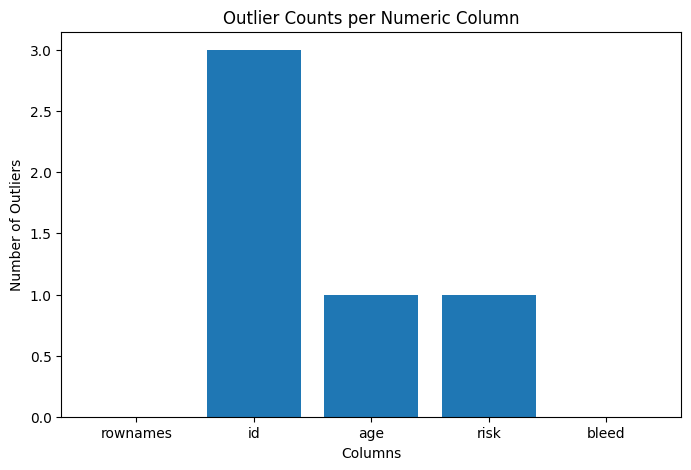

In [57]:
#bar chart
import matplotlib.pyplot as plt

plt.bar(outlier_summary.keys(), outlier_summary.values())
plt.ylabel("Number of Outliers")
plt.xlabel("Columns")
plt.title("Outlier Counts per Numeric Column")
plt.show()

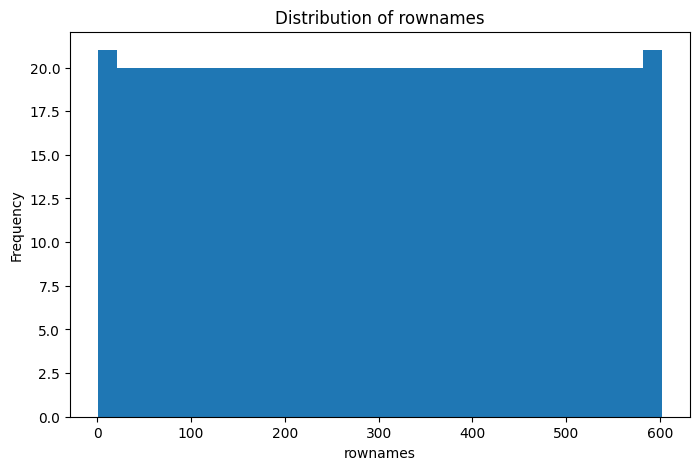

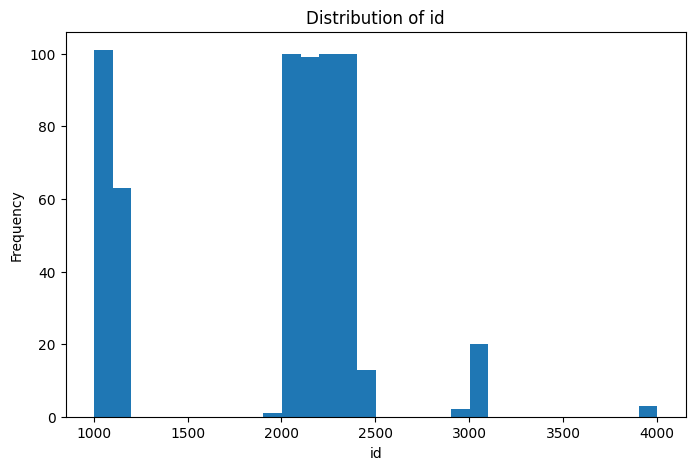

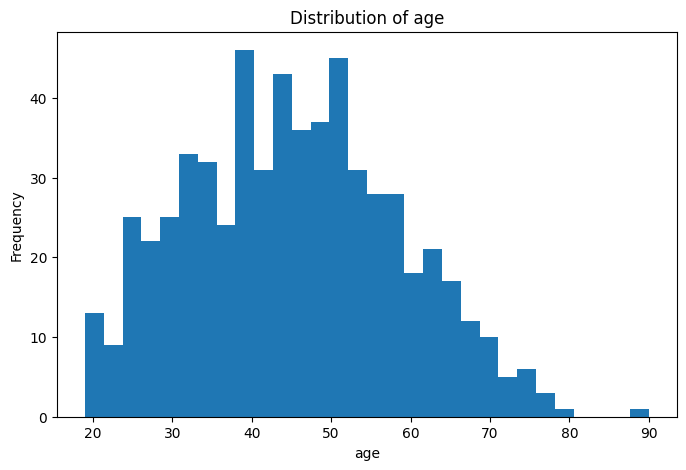

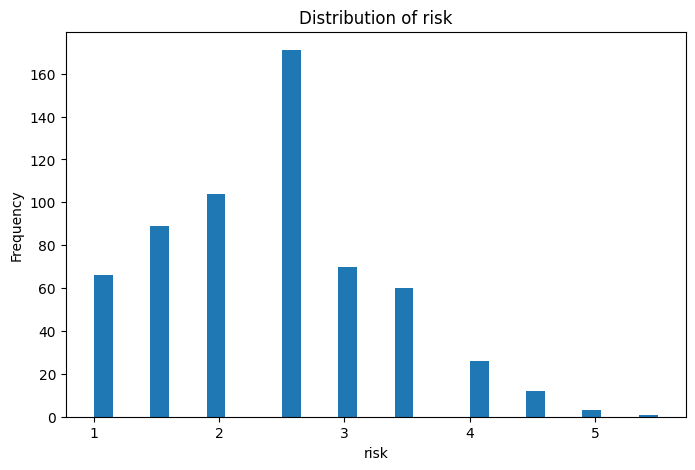

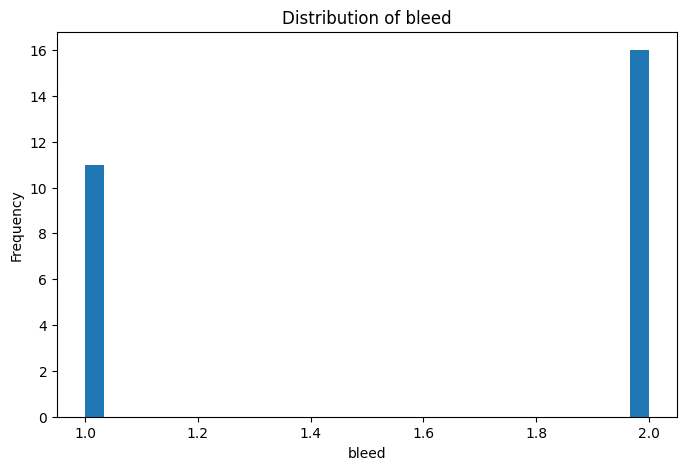

In [58]:
# --- 5) Univariate Analysis ---
df_clean = df.copy()
num_cols = df_clean.select_dtypes(include='number').columns.tolist()


# 5.1 Histograms for numerical columns (capped to first 10 for brevity)
plot_num = num_cols[:10]
if len(plot_num) > 0:
    for c in plot_num:
        plt.figure()
        plt.hist(df_clean[c].dropna(), bins=30)
        plt.title(f"Distribution of {c}")
        plt.xlabel(c)
        plt.ylabel("Frequency")
        plt.show()


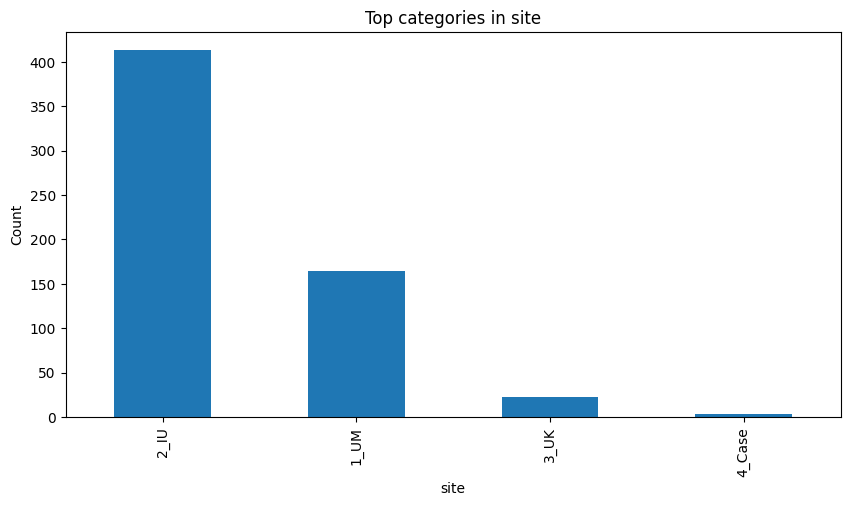

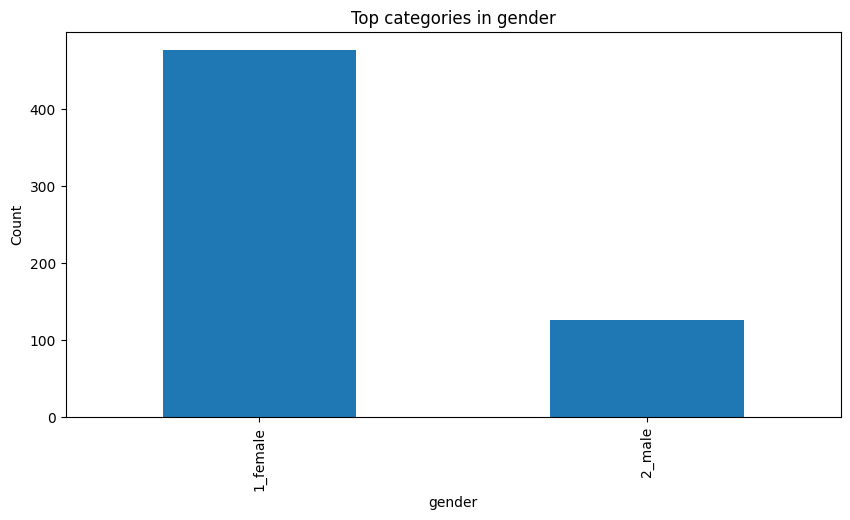

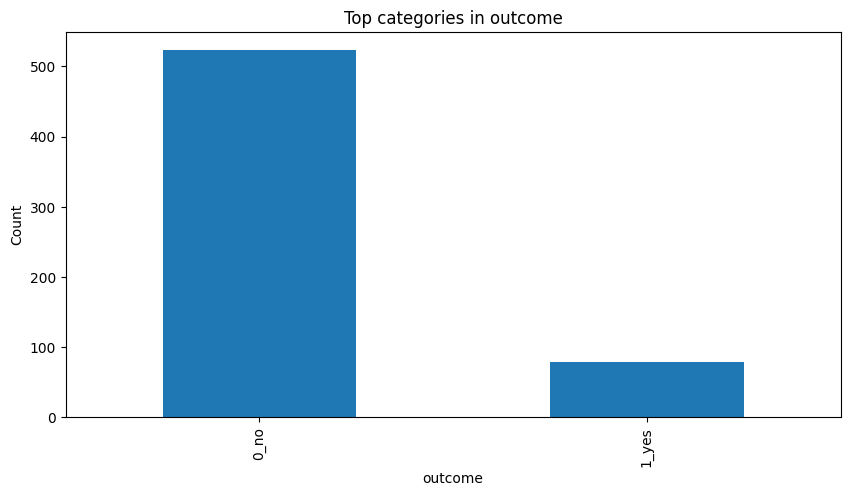

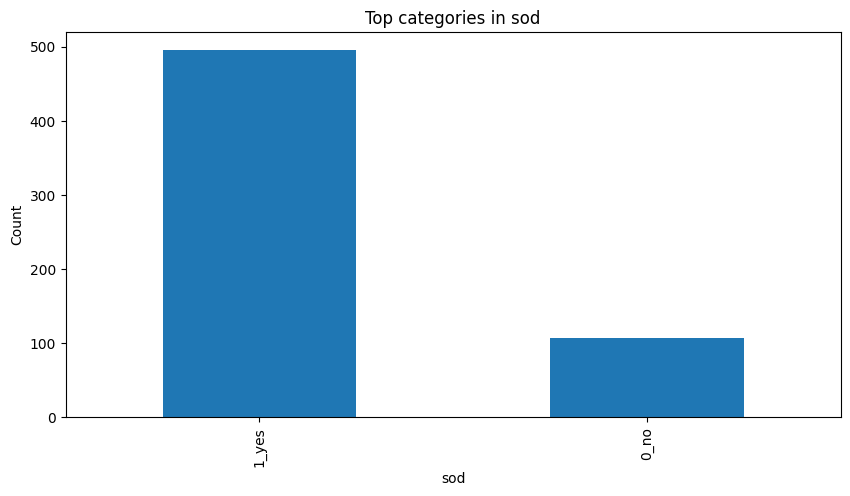

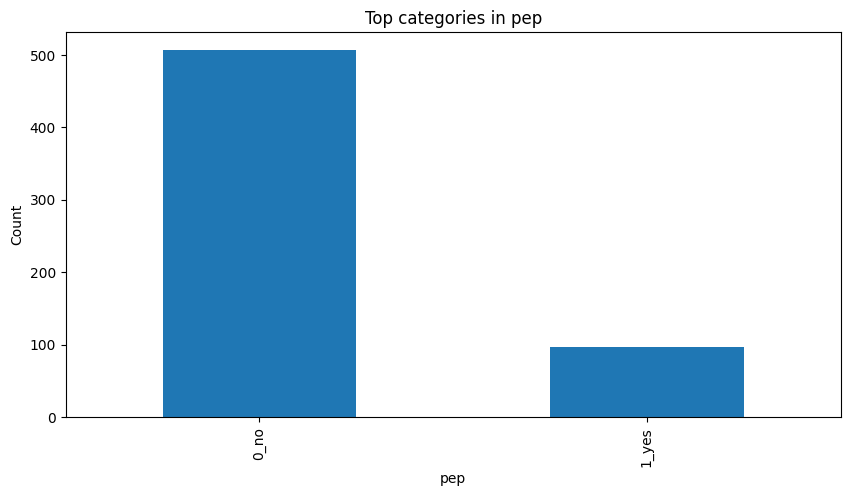

In [59]:
# 5.2 Bar plots for top categories (first 5 categorical columns)

df_clean = df.copy()
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()


plot_cat = cat_cols[:5]
for c in plot_cat:
    plt.figure(figsize=(10,5))
    df_clean[c].value_counts().head(15).plot(kind="bar")
    plt.title(f"Top categories in {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df_clean = df.copy()

num_cols = df_clean.select_dtypes(include='number').columns.tolist()
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()


=== Top correlated numeric pairs (abs value) ===
id vs rownames | corr=0.897


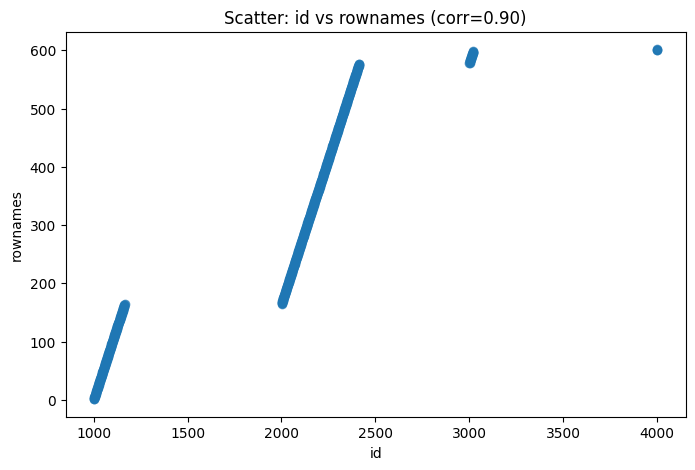

age vs bleed | corr=-0.418


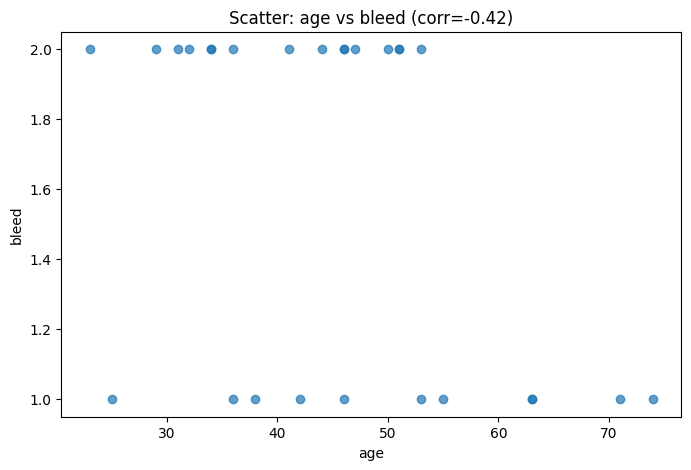

bleed vs id | corr=-0.266


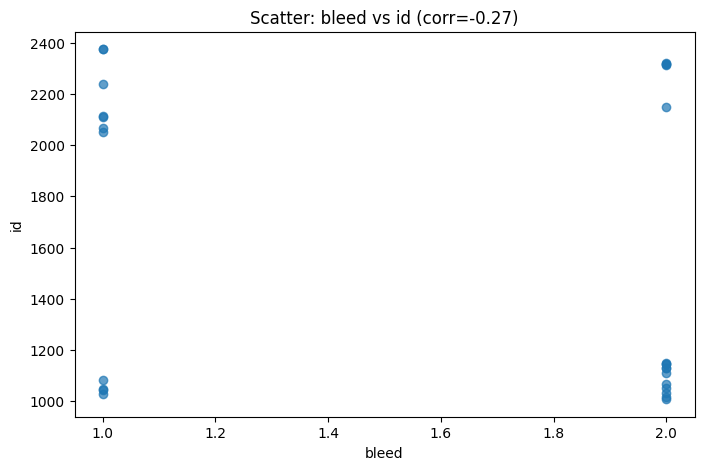

age vs risk | corr=-0.217


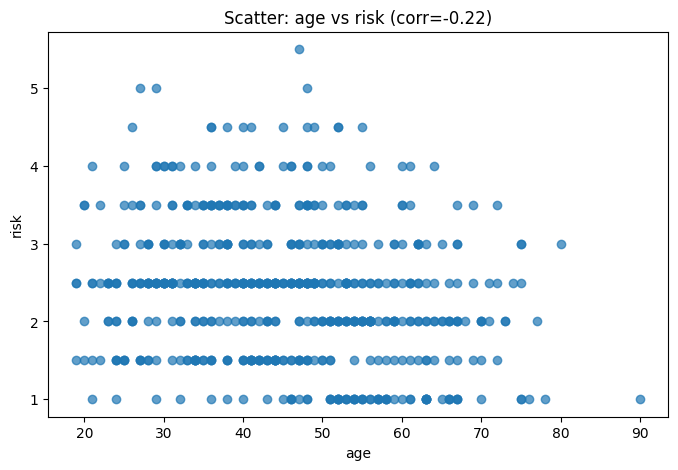

id vs risk | corr=0.167


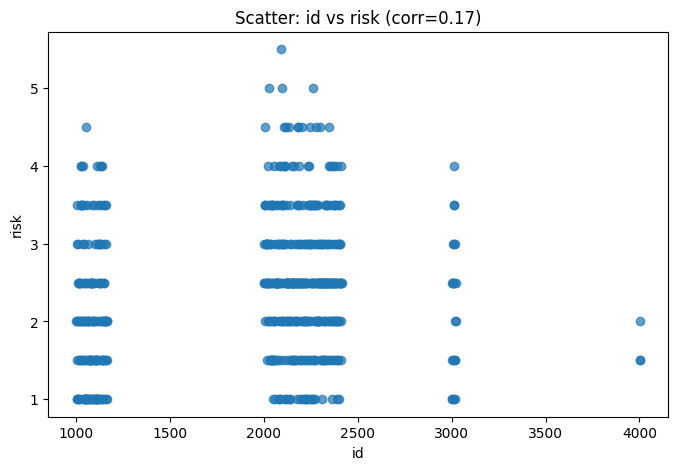

In [61]:
# 6.1 Correlation with top numeric pairs (scatter)
if len(num_cols) >= 2:
    # Compute correlations
    corr = df_clean[num_cols].corr(numeric_only=True)

    corr_pairs = (
        corr.where(~np.eye(corr.shape[0], dtype=bool))
            .stack()
            .abs()
            .sort_values(ascending=False)
    )
    top_pairs = [(a,b) for (a,b) in corr_pairs.index if a < b][:5]

    print("\n=== Top correlated numeric pairs (abs value) ===")
    for a,b in top_pairs:
        print(f"{a} vs {b} | corr={corr.loc[a,b]:.3f}")
        plt.figure()
        plt.scatter(df_clean[a], df_clean[b], alpha=0.7)
        plt.title(f"Scatter: {a} vs {b} (corr={corr.loc[a,b]:.2f})")
        plt.xlabel(a); plt.ylabel(b)
        plt.show()

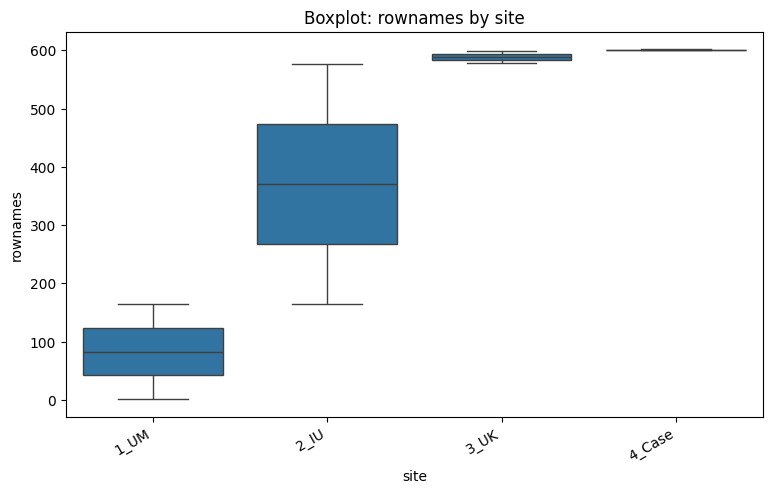

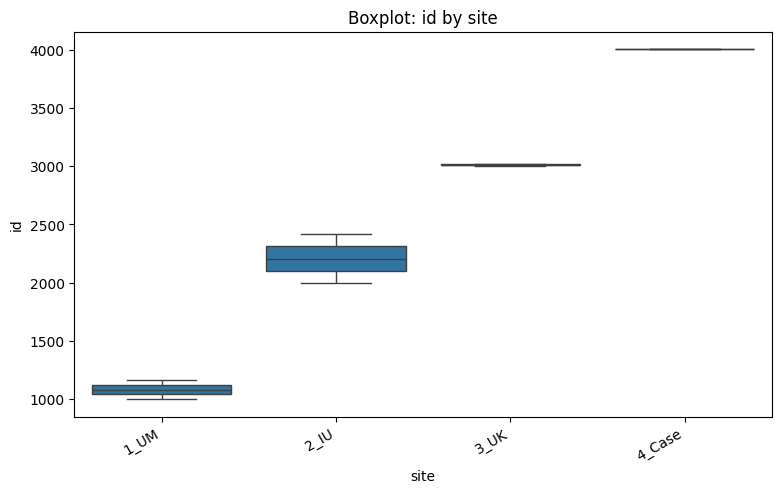

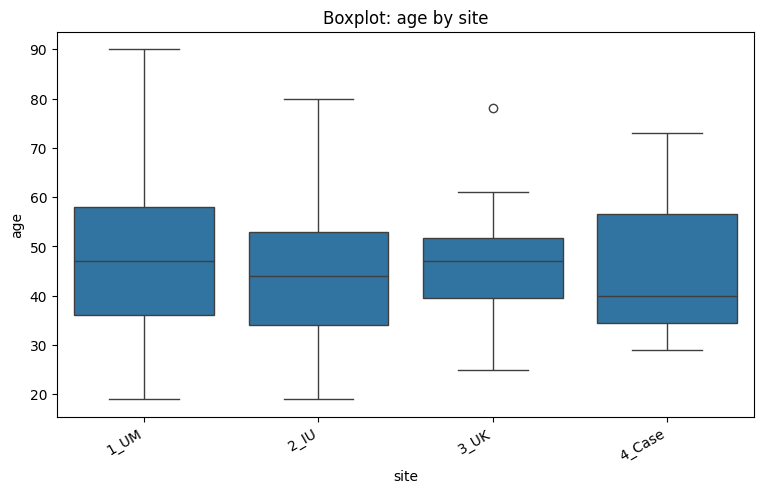

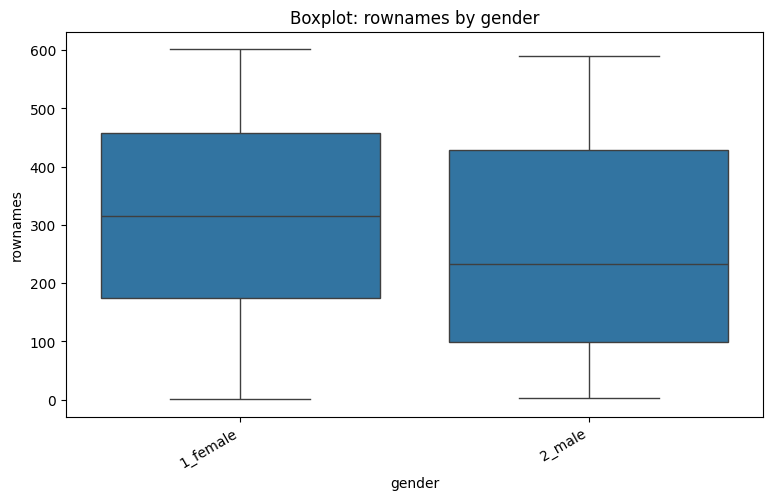

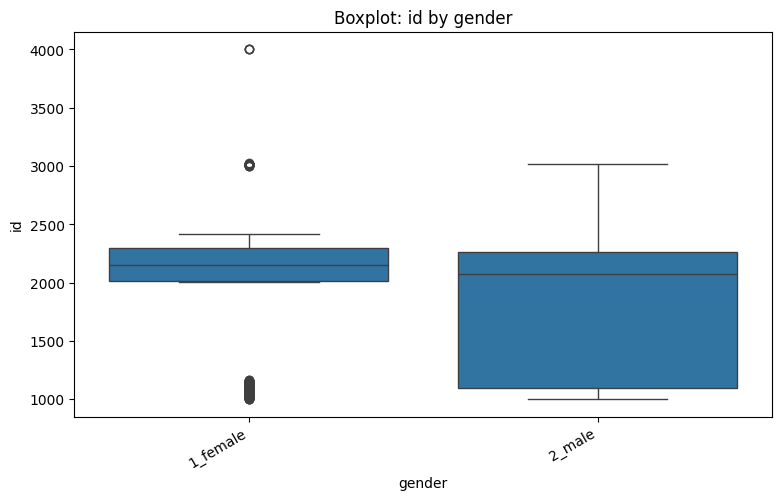

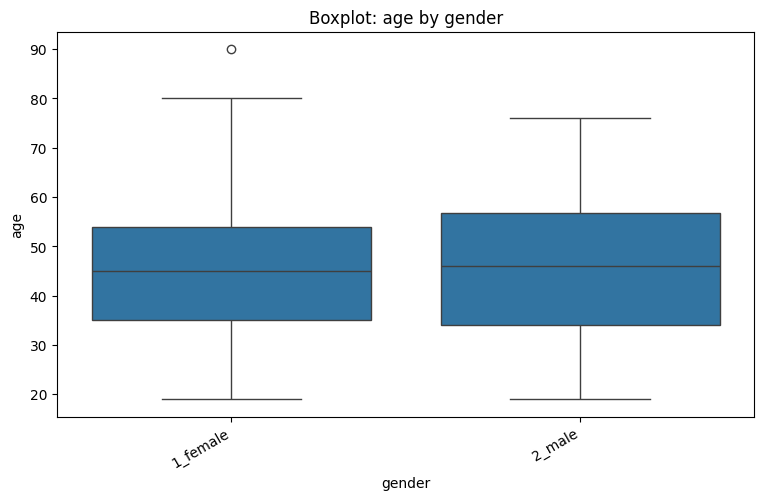

In [62]:
# 6.2 Boxplots: numerical vs categorical (first 2 cat × first 3 num)
for c in cat_cols[:2]:
    for n in num_cols[:3]:
        plt.figure(figsize=(9,5))
        sns.boxplot(x=df_clean[c], y=df_clean[n])
        plt.title(f"Boxplot: {n} by {c}")
        plt.xticks(rotation=30, ha="right")
        plt.show()


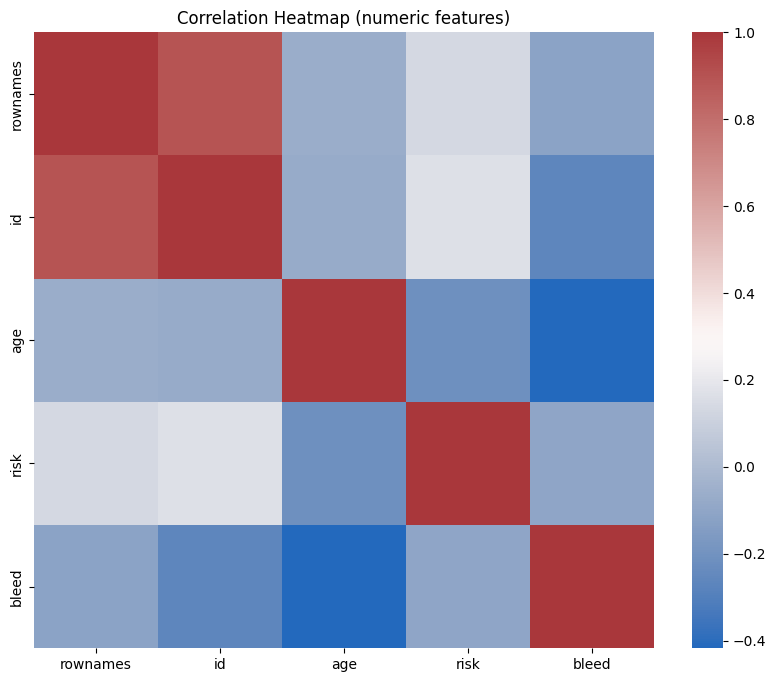

In [63]:
# --- 7) Multivariate Analysis (CO5) ---

# 7.1 Correlation Heatmap
if num_cols:
    corr_all = df_clean[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_all, cmap="vlag", annot=False)
    plt.title("Correlation Heatmap (numeric features)")
    plt.show()

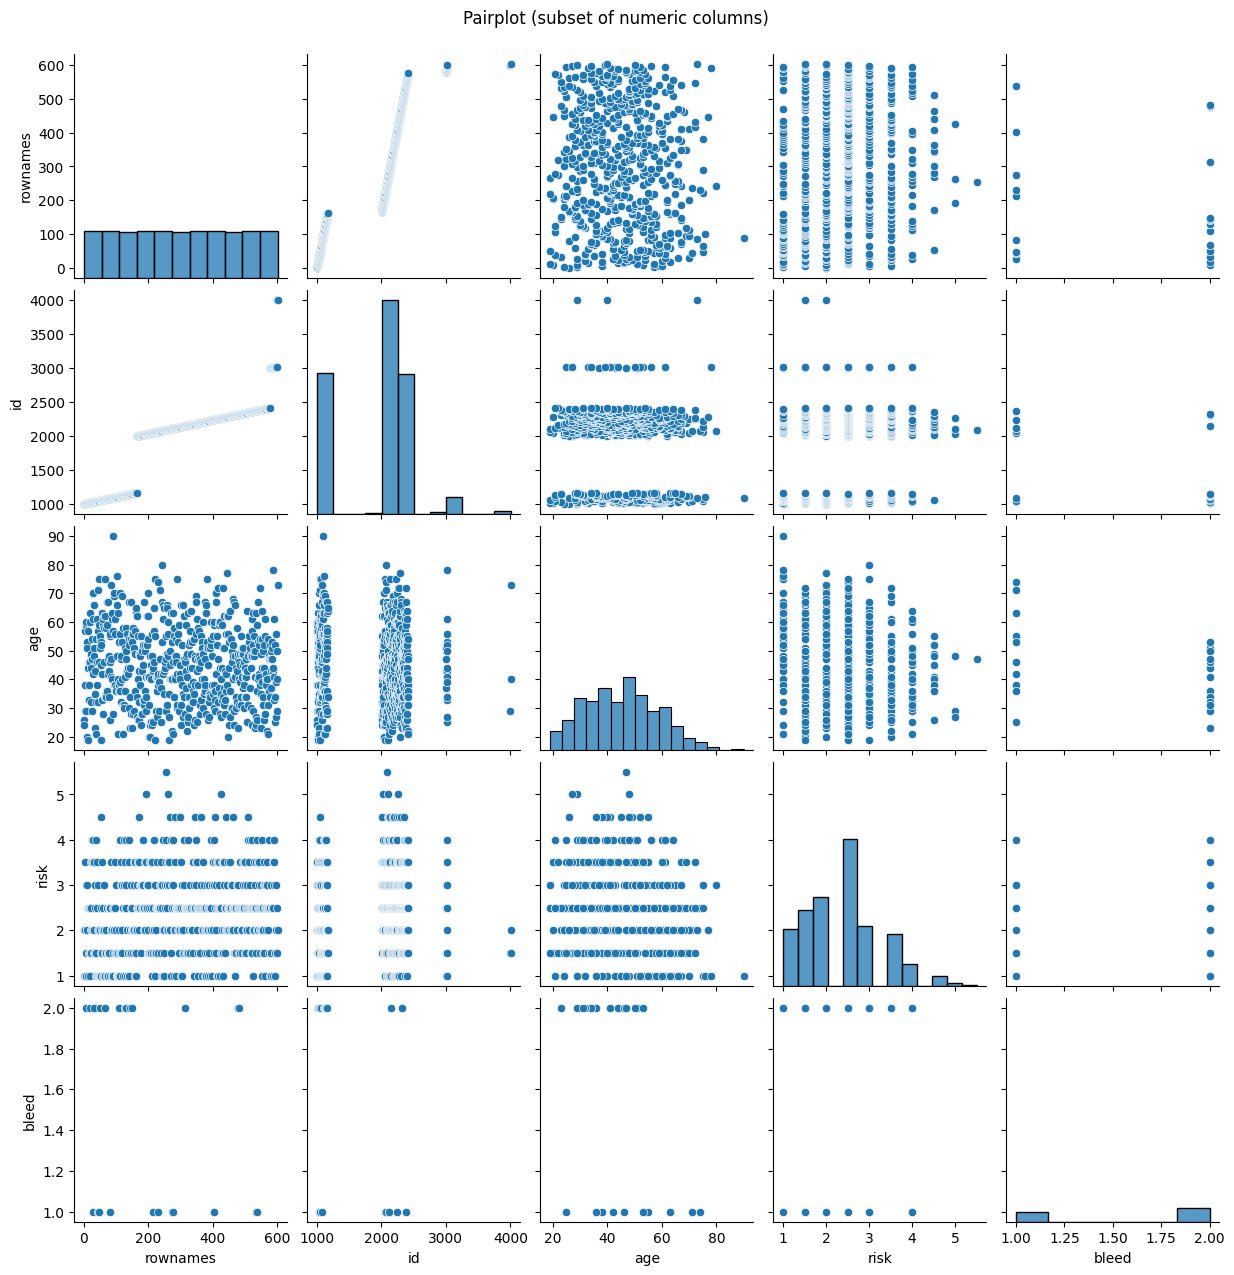

In [64]:
# 7.2 Pairplot for a subset of numeric columns (up to 6 to keep it readable)
sub_nums = num_cols[:6]
if len(sub_nums) >= 2:
    sns.pairplot(df_clean[sub_nums], diag_kind="hist")
    plt.suptitle("Pairplot (subset of numeric columns)", y=1.02)
    plt.show()



PCA Explained Variance Ratios (2 comps): [0.39436971 0.23157804]
Total variance explained (2D): 0.6259477447882519


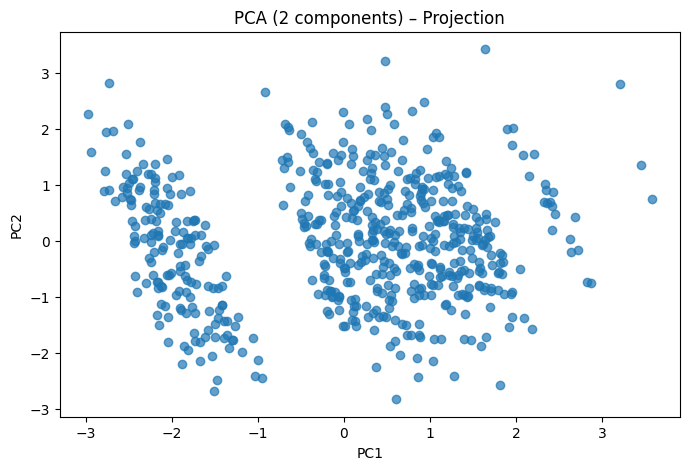

In [65]:
# 7.3 PCA (Principal Component Analysis) – dimensionality reduction to 2D
if len(num_cols) >= 3:
    X = df_clean[num_cols].copy()
    X = X.fillna(X.median())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    print("\nPCA Explained Variance Ratios (2 comps):", pca.explained_variance_ratio_)
    print("Total variance explained (2D):", pca.explained_variance_ratio_.sum())

    plt.figure()
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
    plt.title("PCA (2 components) – Projection")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()


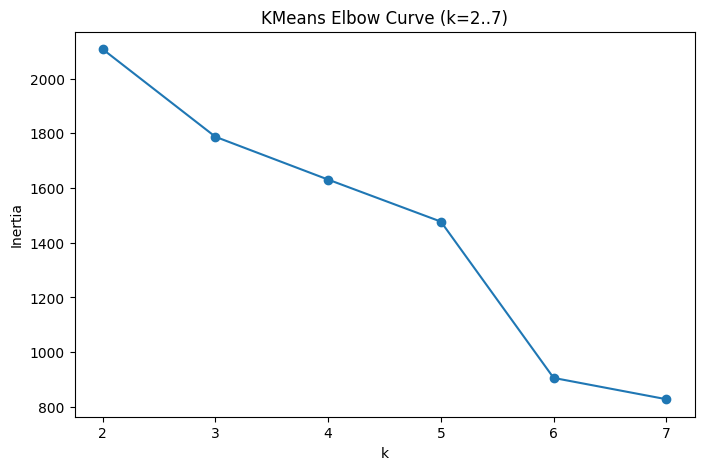

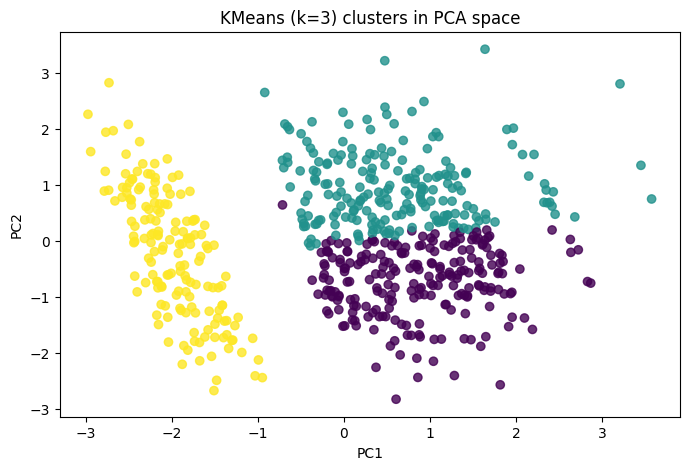


Cluster sizes (k=3):


,count
cluster_k3,
0,229
1,209
2,164


In [66]:
# 7.4 KMeans clustering (on scaled numeric features)
if len(num_cols) >= 3:
    # Elbow method
    inertias = []
    K = range(2, 8)
    for k in K:
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_scaled)
        inertias.append(km.inertia_)

    plt.figure()
    plt.plot(list(K), inertias, marker="o")
    plt.title("KMeans Elbow Curve (k=2..7)")
    plt.xlabel("k"); plt.ylabel("Inertia")
    plt.show()

    # Choose k=3 as default
    km3 = KMeans(n_clusters=3, random_state=42)
    cluster_labels = km3.fit_predict(X_scaled)

    plt.figure()
    plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, alpha=0.8)
    plt.title("KMeans (k=3) clusters in PCA space")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()

    df_clean["cluster_k3"] = cluster_labels
    print("\nCluster sizes (k=3):")
    display(df_clean["cluster_k3"].value_counts())


In [67]:
print("\n=== Cleaned Data Snapshot ===")
display(df_clean.head())


=== Cleaned Data Snapshot ===


,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,psphinc,precut,difcan,pneudil,amp,paninj,acinar,brush,asa81,asa325,asa,prophystent,therastent,pdstent,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed,cluster_k3
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN,2
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN,2
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN,2
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN,2
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN,2


In [68]:
# --- 9) Observations  ---
print(f"""
Observations:
1) Dimensions: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns.
2) Missing data handled: numeric imputed with median, categorical with mode.
3) Univariate: Key numeric distributions plotted; top categories visualized.
4) Bivariate: Top correlated numeric pairs shown; boxplots for numeric vs categorical.
5) Multivariate (CO5): Correlation heatmap, pairplot, PCA (2D), KMeans clustering.
""")


Observations:
1) Dimensions: 602 rows, 35 columns.
2) Missing data handled: numeric imputed with median, categorical with mode.
3) Univariate: Key numeric distributions plotted; top categories visualized.
4) Bivariate: Top correlated numeric pairs shown; boxplots for numeric vs categorical.
5) Multivariate (CO5): Correlation heatmap, pairplot, PCA (2D), KMeans clustering.

